In [1]:
import numpy as np
import matplotlib.pyplot as plt
import starry

starry.config.lazy = False
starry.config.quiet = True

In [2]:
# importing the data into arrays
# first column of the data file is phase data
TessPhaseHalf = np.loadtxt("GD356allTess.dat", usecols=(0))
TessPhase = np.concatenate((TessPhaseHalf, TessPhaseHalf+1))
# second column of the data file is flux data
TessFluxHalf = np.loadtxt("GD356allTess.dat", usecols=(1))
TessFlux = np.concatenate((TessFluxHalf+1, TessFluxHalf+1))
# third column of the data file is flux error
TessErrorHalf = np.loadtxt("GD356allTess.dat", usecols=(2))
TessError = np.concatenate((TessErrorHalf, TessErrorHalf))

In [3]:
def mean_data(Phase, Flux, Error, bins):

    Phase_split = np.array_split(Phase, bins)
    Flux_split = np.array_split(Flux, bins)
    Error_split = np.array_split(Error, bins)

    meanPhase = [] * bins
    meanFlux = [] * bins
    meanError = [] * bins

    for i in range(bins):

        meanPhase_i = np.mean(Phase_split[i])
        meanFlux_i = np.sum(Flux_split[i] / (Error_split[i]**2))/ np.sum(1/(Error_split[i]**2))

        meanError_i = np.sqrt(1/np.sum(1/(Error_split[i]**2)))

        meanPhase.append(meanPhase_i)
        meanFlux.append(meanFlux_i)
        meanError.append(meanError_i)
        
    return meanPhase, meanFlux, meanError

meanPhase, meanFlux, meanError = mean_data(TessPhase, TessFlux, TessError, 200)
theta = np.multiply(meanPhase, 360)

In [7]:
contrast = 1-0.01
radius = 40
map = starry.Map(ydeg=30)
map.spot(contrast=contrast, radius=radius, lat=90-60, lon=45)
map.inc = 0.7
#map.show()

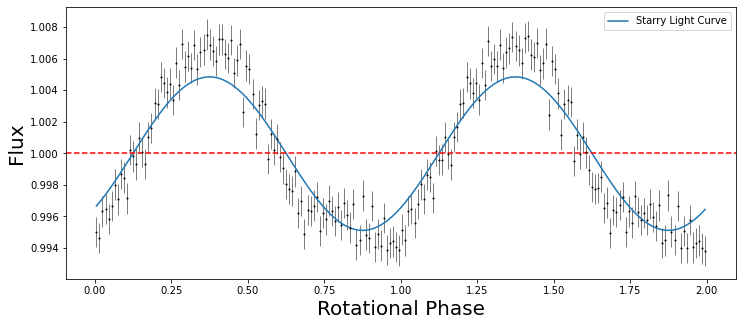

In [8]:
median = np.median(map.flux(theta=theta))
newFlux = map.flux(theta=theta)/median

plt.figure(figsize=(12, 5))

plt.plot(meanPhase, newFlux, label='Starry Light Curve')
plt.xlabel("Rotational phase", fontsize=20)
plt.legend()
plt.ylabel("Flux", fontsize=20)
plt.errorbar(meanPhase, meanFlux, yerr=meanError, color='black', marker='.', linestyle='none', markersize=2, elinewidth=0.5)
plt.xlabel('Rotational Phase')
plt.ylabel('Flux')
plt.axhline(y=1, color='r', linestyle='--');

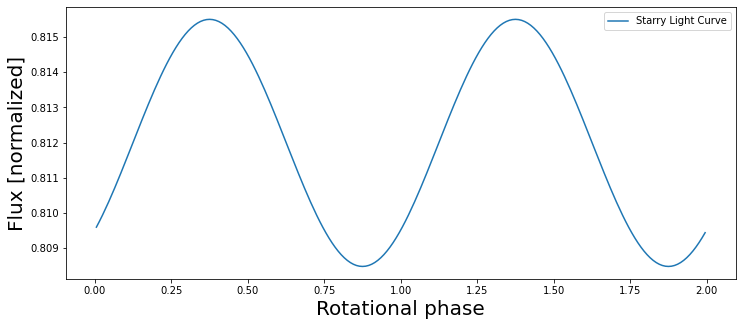

In [46]:
plt.figure(figsize=(12, 5))

amplitude = (np.amax(map.flux(theta=theta)) - np.amin(map.flux(theta=theta)))/2
mean = np.mean(map.flux(theta=theta))

plt.plot(meanPhase, map.flux(theta=theta), label='Starry Light Curve')
plt.xlabel("Rotational phase", fontsize=20)
plt.legend()
plt.ylabel("Flux [normalized]", fontsize=20);

In [47]:
np.amax(newFlux) - np.mean(newFlux)

0.004311659275335278

In [10]:
contrast = 0.9
map = starry.Map(ydeg=30)
map.spot(contrast=contrast, radius=radius, lat=90-60, lon=45)
map.inc = 1.4
#map.show()

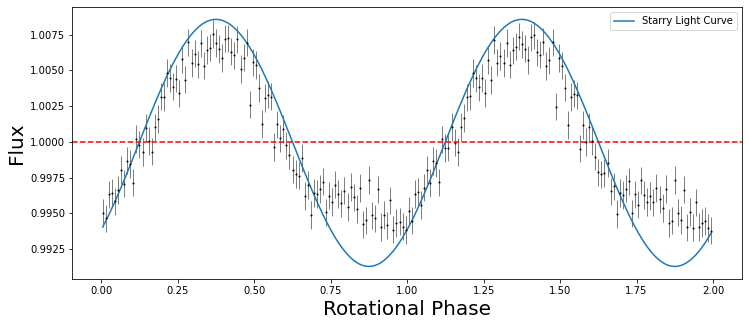

In [11]:
median = np.median(map.flux(theta=theta))
newFlux = map.flux(theta=theta)/median

plt.figure(figsize=(12, 5))

plt.plot(meanPhase, newFlux, label='Starry Light Curve')
plt.xlabel("Rotational phase", fontsize=20)
plt.legend()
plt.ylabel("Flux", fontsize=20)
plt.errorbar(meanPhase, meanFlux, yerr=meanError, color='black', marker='.', linestyle='none', markersize=2, elinewidth=0.5)
plt.xlabel('Rotational Phase')
plt.ylabel('Flux')
plt.axhline(y=1, color='r', linestyle='--');

In [29]:
np.amax(newFlux) - np.mean(newFlux)

0.00433225021607464

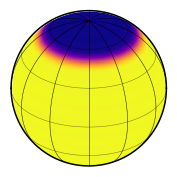

In [49]:
contrast = 1-0.1
map = starry.Map(ydeg=30)
map.spot(contrast=contrast, radius=radius, lat=90-0.7, lon=45)
map.inc = 60
map.show()

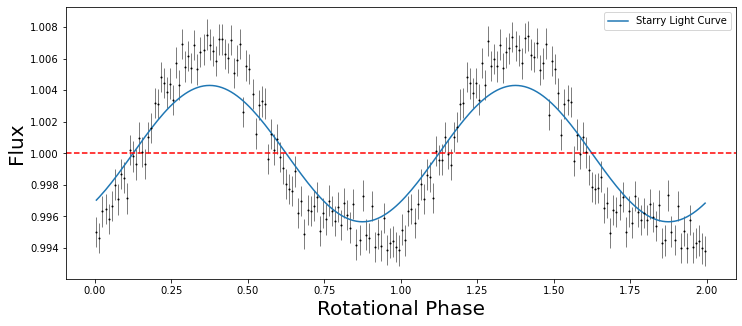

In [50]:
median = np.median(map.flux(theta=theta))
newFlux = map.flux(theta=theta)/median

plt.figure(figsize=(12, 5))

plt.plot(meanPhase, newFlux, label='Starry Light Curve')
plt.xlabel("Rotational phase", fontsize=20)
plt.legend()
plt.ylabel("Flux", fontsize=20)
plt.errorbar(meanPhase, meanFlux, yerr=meanError, color='black', marker='.', linestyle='none', markersize=2, elinewidth=0.5)
plt.xlabel('Rotational Phase')
plt.ylabel('Flux')
plt.axhline(y=1, color='r', linestyle='--');

In [51]:
np.amax(newFlux) - np.mean(newFlux)

0.0043116591732556

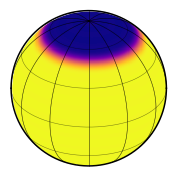

In [33]:
contrast = 0.5
map = starry.Map(ydeg=30)
map.spot(contrast=contrast, radius=radius, lat=90-1.5, lon=45)
map.inc = 60
map.show()

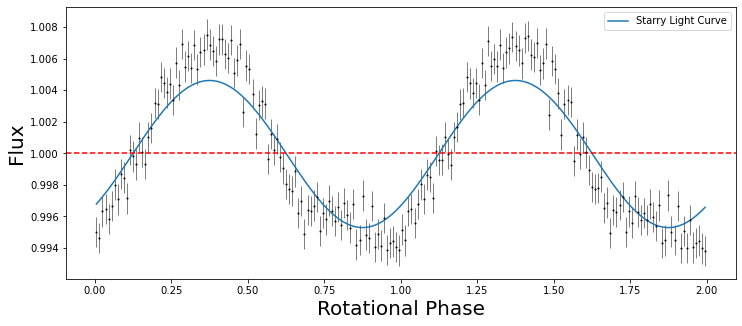

In [34]:
median = np.median(map.flux(theta=theta))
newFlux = map.flux(theta=theta)/median

plt.figure(figsize=(12, 5))

plt.plot(meanPhase, newFlux, label='Starry Light Curve')
plt.xlabel("Rotational phase", fontsize=20)
plt.legend()
plt.ylabel("Flux", fontsize=20)
plt.errorbar(meanPhase, meanFlux, yerr=meanError, color='black', marker='.', linestyle='none', markersize=2, elinewidth=0.5)
plt.xlabel('Rotational Phase')
plt.ylabel('Flux')
plt.axhline(y=1, color='r', linestyle='--');

In [35]:
np.amax(newFlux) - np.mean(newFlux)

0.004639874399498867

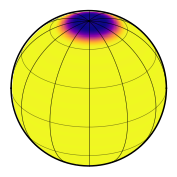

In [52]:
contrast = 0.5
map = starry.Map(ydeg=30)
map.spot(contrast=contrast, radius=radius/2, lat=90-1.5, lon=45)
map.inc = 60
map.show()

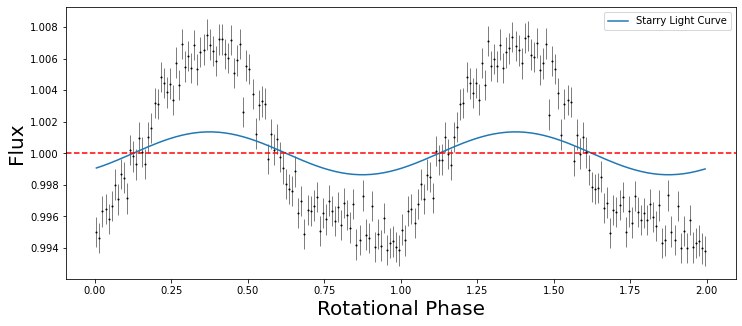

In [53]:
median = np.median(map.flux(theta=theta))
newFlux = map.flux(theta=theta)/median

plt.figure(figsize=(12, 5))

plt.plot(meanPhase, newFlux, label='Starry Light Curve')
plt.xlabel("Rotational phase", fontsize=20)
plt.legend()
plt.ylabel("Flux", fontsize=20)
plt.errorbar(meanPhase, meanFlux, yerr=meanError, color='black', marker='.', linestyle='none', markersize=2, elinewidth=0.5)
plt.xlabel('Rotational Phase')
plt.ylabel('Flux')
plt.axhline(y=1, color='r', linestyle='--');

In [54]:
np.amax(newFlux) - np.mean(newFlux)

0.001359250242270349